Experiment 1


In [1]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Dataset C.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

In [4]:
data = pd.read_csv('training-c.csv')
data.head(1)

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,c00000.png,Scan_280_digit_6_num_7.png,280,6,OngkoDB,Buet_Backpropers,training-c


In [5]:

data.drop(['original filename','scanid'],axis=1,inplace=True)
data.drop(data.columns[2:5],axis=1,inplace=True)
data.head(1)


,filename,digit
0,c00000.png,6


In [6]:
class CustomDatasetmine(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  def __len__(self):
    return len(self.annotations)
  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
    image= io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

    if self.transform:
      image=self.transform(image)
    return (image, y_label)

In [7]:
data = CustomDatasetmine("/content/training-c.csv","/content/training-c", transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(32, 32)), transforms.ToTensor()]))
train_set, test_set = torch.utils.data.random_split(data,[19438,4860])

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 32*32 # num_features = 784
num_hidden = 200
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2999207973480225. Accuracy: 9.074074074074074
Iteration: 1000. Loss: 2.303501844406128. Accuracy: 9.197530864197532
Iteration: 1500. Loss: 2.3030407428741455. Accuracy: 9.794238683127572
Iteration: 2000. Loss: 2.2973930835723877. Accuracy: 9.074074074074074
Iteration: 2500. Loss: 2.304732322692871. Accuracy: 9.197530864197532
Iteration: 3000. Loss: 2.2988650798797607. Accuracy: 9.074074074074074
Iteration: 3500. Loss: 2.2963509559631348. Accuracy: 9.074074074074074
Iteration: 4000. Loss: 2.298217296600342. Accuracy: 9.197530864197532
Iteration: 4500. Loss: 2.3016586303710938. Accuracy: 9.197530864197532
Iteration: 5000. Loss: 2.299363851547241. Accuracy: 9.197530864197532
Iteration: 5500. Loss: 2.3014039993286133. Accuracy: 9.074074074074074
Iteration: 6000. Loss: 2.302075147628784. Accuracy: 9.197530864197532
Iteration: 6500. Loss: 2.3133997917175293. Accuracy: 9.074074074074074
Iteration: 7000. Loss: 2.3063535690307617. Accuracy: 9.197530864197532
Iteration: 7

[2.2999207973480225, 2.303501844406128, 2.3030407428741455, 2.2973930835723877, 2.304732322692871, 2.2988650798797607, 2.2963509559631348, 2.298217296600342, 2.3016586303710938, 2.299363851547241, 2.3014039993286133, 2.302075147628784, 2.3133997917175293, 2.3063535690307617, 2.3019609451293945, 2.3055453300476074, 2.293604612350464, 2.3021304607391357, 2.301344633102417, 2.301650285720825, 2.3088762760162354, 2.305349826812744, 2.2984094619750977, 2.2985947132110596, 2.3009846210479736, 2.312939405441284, 2.300358295440674, 2.3067946434020996, 2.2992241382598877, 2.2987570762634277, 2.3026111125946045, 2.303093433380127, 2.3088879585266113, 2.3016371726989746, 2.3038687705993652, 2.302828311920166, 2.2988147735595703, 2.2979538440704346]


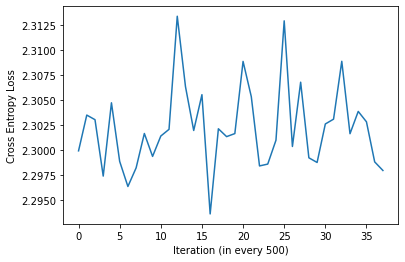

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### **Experiment 2**



Iteration 50000

In [ ]:
# Hyperparameters
batch_size = 100
num_iters = 50000
input_dim = 32*32 
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3044273853302. Accuracy: 9.835390946502057
Iteration: 1000. Loss: 2.303795099258423. Accuracy: 8.806584362139917
Iteration: 1500. Loss: 2.3033602237701416. Accuracy: 8.806584362139917
Iteration: 2000. Loss: 2.303896188735962. Accuracy: 8.806584362139917
Iteration: 2500. Loss: 2.3036773204803467. Accuracy: 8.806584362139917
Iteration: 3000. Loss: 2.301060676574707. Accuracy: 8.806584362139917
Iteration: 3500. Loss: 2.304511308670044. Accuracy: 8.806584362139917
Iteration: 4000. Loss: 2.3032593727111816. Accuracy: 8.806584362139917
Iteration: 4500. Loss: 2.3009426593780518. Accuracy: 8.806584362139917
Iteration: 5000. Loss: 2.302614450454712. Accuracy: 8.806584362139917
Iteration: 5500. Loss: 2.3037467002868652. Accuracy: 8.806584362139917
Iteration: 6000. Loss: 2.3020496368408203. Accuracy: 8.806584362139917
Iteration: 6500. Loss: 2.3032660484313965. Accuracy: 8.806584362139917
Iteration: 7000. Loss: 2.303889036178589. Accuracy: 8.806584362139917
Iteration: 7500.

[2.3044273853302, 2.303795099258423, 2.3033602237701416, 2.303896188735962, 2.3036773204803467, 2.301060676574707, 2.304511308670044, 2.3032593727111816, 2.3009426593780518, 2.302614450454712, 2.3037467002868652, 2.3020496368408203, 2.3032660484313965, 2.303889036178589, 2.3038344383239746, 2.3025400638580322, 2.300581932067871, 2.301607608795166, 2.302751064300537, 2.3015058040618896, 2.301119804382324, 2.2991690635681152, 2.303999423980713, 2.3038530349731445, 2.302694082260132, 2.3028364181518555, 2.303208589553833, 2.302536725997925, 2.302778720855713, 2.3024332523345947, 2.303302049636841, 2.3031768798828125, 2.3017148971557617, 2.302959680557251, 2.303872585296631, 2.3015694618225098, 2.3043155670166016, 2.303050994873047, 2.304044008255005, 2.3036062717437744, 2.3009066581726074, 2.3015875816345215, 2.299220561981201, 2.3027985095977783, 2.302229404449463, 2.3000335693359375, 2.302077293395996, 2.3004355430603027, 2.3015170097351074, 2.2984819412231445, 2.301246404647827, 2.3014

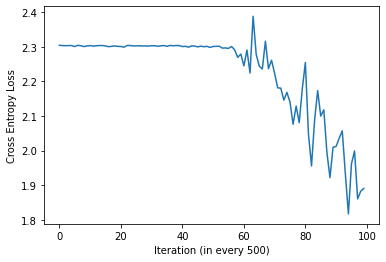

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Iteration 70000

In [9]:
# Hyperparameters
batch_size = 80
num_iters = 70000
input_dim = 32*32 # num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

      

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

     
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)    
         
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3036999702453613. Accuracy: 9.753086419753087
Iteration: 1000. Loss: 2.3035528659820557. Accuracy: 9.465020576131687
Iteration: 1500. Loss: 2.3000545501708984. Accuracy: 9.506172839506172
Iteration: 2000. Loss: 2.3033900260925293. Accuracy: 12.798353909465021
Iteration: 2500. Loss: 2.3006770610809326. Accuracy: 12.860082304526749
Iteration: 3000. Loss: 2.3010096549987793. Accuracy: 10.1440329218107
Iteration: 3500. Loss: 2.299420118331909. Accuracy: 10.473251028806585
Iteration: 4000. Loss: 2.301546573638916. Accuracy: 9.48559670781893
Iteration: 4500. Loss: 2.3026137351989746. Accuracy: 9.7119341563786
Iteration: 5000. Loss: 2.30305814743042. Accuracy: 16.83127572016461
Iteration: 5500. Loss: 2.2981529235839844. Accuracy: 15.432098765432098
Iteration: 6000. Loss: 2.301217555999756. Accuracy: 14.094650205761317
Iteration: 6500. Loss: 2.2968316078186035. Accuracy: 9.938271604938272
Iteration: 7000. Loss: 2.2969608306884766. Accuracy: 16.049382716049383
Iteration:

[2.3000619411468506, 2.302382707595825, 2.304649829864502, 2.3039956092834473, 2.301112651824951, 2.3016178607940674, 2.303061008453369, 2.2993247509002686, 2.2988944053649902, 2.2956125736236572, 2.29608154296875, 2.2958762645721436, 2.29317045211792, 2.2895891666412354, 2.2890372276306152, 2.271493434906006, 2.246364116668701, 2.2700722217559814, 2.2325472831726074, 2.165105104446411, 2.2064921855926514, 2.1973588466644287, 2.3010787963867188, 2.109302043914795, 2.310283899307251, 2.237640857696533, 2.265986919403076, 2.1980369091033936, 2.125525712966919, 2.199094295501709, 2.0763497352600098, 2.1554365158081055, 2.261418104171753, 2.4077341556549072, 2.1273419857025146, 1.9579181671142578, 2.068206310272217, 2.0007665157318115, 1.9472682476043701, 2.0117061138153076, 1.9936240911483765, 1.8240770101547241, 2.1175217628479004, 2.0859780311584473, 2.1830458641052246, 2.035177707672119, 1.8811094760894775, 2.03751277923584, 1.8156166076660156, 2.1834616661071777, 2.110971689224243, 2.

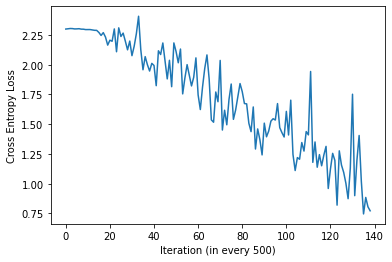

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters
batch_size = 50
num_iters = 80000
input_dim = 32*32 # num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)    
         
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.301619052886963. Accuracy: 10.411522633744855
Iteration: 1000. Loss: 2.302791118621826. Accuracy: 10.308641975308642
Iteration: 1500. Loss: 2.2887749671936035. Accuracy: 9.34156378600823
Iteration: 2000. Loss: 2.3075640201568604. Accuracy: 10.843621399176955
Iteration: 2500. Loss: 2.2982823848724365. Accuracy: 9.362139917695472
Iteration: 3000. Loss: 2.3040616512298584. Accuracy: 13.950617283950617
Iteration: 3500. Loss: 2.3034677505493164. Accuracy: 14.25925925925926
Iteration: 4000. Loss: 2.287644386291504. Accuracy: 14.40329218106996
Iteration: 4500. Loss: 2.283203363418579. Accuracy: 15.473251028806585
Iteration: 5000. Loss: 2.2726142406463623. Accuracy: 10.720164609053498
Iteration: 5500. Loss: 2.2590487003326416. Accuracy: 17.181069958847736
Iteration: 6000. Loss: 2.2669761180877686. Accuracy: 15.946502057613168
Iteration: 6500. Loss: 2.275562047958374. Accuracy: 10.349794238683128
Iteration: 7000. Loss: 2.4493491649627686. Accuracy: 13.950617283950617
Ite

[2.301619052886963, 2.302791118621826, 2.2887749671936035, 2.3075640201568604, 2.2982823848724365, 2.3040616512298584, 2.3034677505493164, 2.287644386291504, 2.283203363418579, 2.2726142406463623, 2.2590487003326416, 2.2669761180877686, 2.275562047958374, 2.4493491649627686, 2.1194987297058105, 2.200634241104126, 2.174966335296631, 2.221034049987793, 2.140827178955078, 2.425109386444092, 2.002561569213867, 2.0959742069244385, 2.0588088035583496, 2.0975027084350586, 2.1699695587158203, 2.2977592945098877, 2.084904432296753, 2.034855604171753, 2.263068199157715, 2.0857152938842773, 2.1323788166046143, 1.955091953277588, 1.8388513326644897, 1.9138890504837036, 2.090543508529663, 1.852841854095459, 2.060875654220581, 1.978408932685852, 1.916257619857788, 1.7032068967819214, 2.184199571609497, 1.682692289352417, 2.1963307857513428, 2.004452705383301, 1.8592411279678345, 2.173008680343628, 2.0786659717559814, 1.780625581741333, 1.9288040399551392, 1.8649468421936035, 1.8706284761428833, 1.79

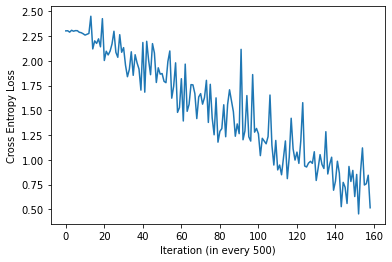

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters
batch_size = 50
num_iters = 80000
input_dim = 32*32 # num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

       

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)    
         
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.269075393676758. Accuracy: 9.835390946502057
Iteration: 1000. Loss: 2.2940449714660645. Accuracy: 11.213991769547325
Iteration: 1500. Loss: 2.284682512283325. Accuracy: 13.395061728395062
Iteration: 2000. Loss: 2.24177622795105. Accuracy: 18.559670781893004
Iteration: 2500. Loss: 2.24053955078125. Accuracy: 23.333333333333332
Iteration: 3000. Loss: 2.233318328857422. Accuracy: 17.20164609053498
Iteration: 3500. Loss: 2.267179489135742. Accuracy: 23.415637860082306
Iteration: 4000. Loss: 2.1633119583129883. Accuracy: 14.938271604938272
Iteration: 4500. Loss: 2.1102700233459473. Accuracy: 18.271604938271604
Iteration: 5000. Loss: 2.152336835861206. Accuracy: 19.362139917695472
Iteration: 5500. Loss: 2.2069284915924072. Accuracy: 23.641975308641975
Iteration: 6000. Loss: 2.1197922229766846. Accuracy: 26.995884773662553
Iteration: 6500. Loss: 2.1513309478759766. Accuracy: 25.37037037037037
Iteration: 7000. Loss: 2.0400307178497314. Accuracy: 22.22222222222222
Iterat

[2.269075393676758, 2.2940449714660645, 2.284682512283325, 2.24177622795105, 2.24053955078125, 2.233318328857422, 2.267179489135742, 2.1633119583129883, 2.1102700233459473, 2.152336835861206, 2.2069284915924072, 2.1197922229766846, 2.1513309478759766, 2.0400307178497314, 2.0541577339172363, 2.0345051288604736, 2.2501401901245117, 2.036261796951294, 2.1644949913024902, 2.277554512023926, 1.9791655540466309, 2.0066421031951904, 1.9248851537704468, 2.1897060871124268, 1.920275092124939, 1.9485734701156616, 2.1347267627716064, 2.165132522583008, 1.8869041204452515, 1.8395730257034302, 1.8415919542312622, 2.105825424194336, 2.070208787918091, 1.8752124309539795, 1.8359640836715698, 2.0885202884674072, 2.1348142623901367, 1.9433761835098267, 2.0556015968322754, 2.0615909099578857, 1.8915733098983765, 1.883844256401062, 1.8589450120925903, 2.088597536087036, 1.7724010944366455, 2.0342705249786377, 1.782151460647583, 1.8345506191253662, 2.0097882747650146, 1.7742806673049927, 2.013556480407715

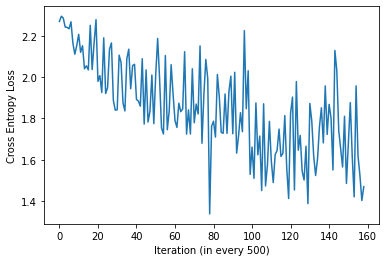

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters
batch_size = 100
num_iters = 80000
input_dim = 32*32 # num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.01


num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 32*32).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 32*32).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)    
         
                # Total correct predictions+
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3020267486572266. Accuracy: 14.176954732510287
Iteration: 1000. Loss: 2.300875186920166. Accuracy: 10.102880658436215
Iteration: 1500. Loss: 2.300522565841675. Accuracy: 9.670781893004115
Iteration: 2000. Loss: 2.294295310974121. Accuracy: 9.77366255144033
Iteration: 2500. Loss: 2.2948131561279297. Accuracy: 13.065843621399177
Iteration: 3000. Loss: 2.29890513420105. Accuracy: 13.641975308641975
Iteration: 3500. Loss: 2.294703722000122. Accuracy: 15.843621399176955
Iteration: 4000. Loss: 2.2841320037841797. Accuracy: 12.222222222222221
Iteration: 4500. Loss: 2.2758562564849854. Accuracy: 18.930041152263374
Iteration: 5000. Loss: 2.266932725906372. Accuracy: 18.97119341563786
Iteration: 5500. Loss: 2.2485480308532715. Accuracy: 21.790123456790123
Iteration: 6000. Loss: 2.2810420989990234. Accuracy: 17.921810699588477
Iteration: 6500. Loss: 2.188978910446167. Accuracy: 14.938271604938272
Iteration: 7000. Loss: 2.1714203357696533. Accuracy: 22.921810699588477
Itera

[2.3020267486572266, 2.300875186920166, 2.300522565841675, 2.294295310974121, 2.2948131561279297, 2.29890513420105, 2.294703722000122, 2.2841320037841797, 2.2758562564849854, 2.266932725906372, 2.2485480308532715, 2.2810420989990234, 2.188978910446167, 2.1714203357696533, 2.136094093322754, 2.285360336303711, 2.2046332359313965, 2.115936040878296, 2.0451700687408447, 2.1024134159088135, 2.0608103275299072, 2.084716320037842, 2.045191764831543, 2.067124128341675, 2.183807134628296, 2.108828067779541, 2.123053550720215, 2.196730613708496, 2.0688905715942383, 1.9569381475448608, 2.1654415130615234, 1.92795991897583, 2.0457820892333984, 1.9773459434509277, 1.7965645790100098, 1.9302488565444946, 1.9013900756835938, 1.8512769937515259, 1.833542823791504, 2.03324818611145, 1.8546404838562012, 2.016763687133789, 2.038728713989258, 2.1592421531677246, 1.6055892705917358, 1.8246943950653076, 1.8170994520187378, 1.8644028902053833, 1.8406295776367188, 1.8809322118759155, 2.022148847579956, 1.709

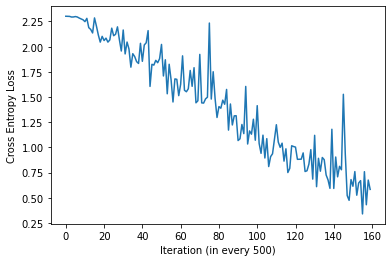

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()